MNIST DIGIT RECOGNITION MODEL

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Starting Training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9137 - loss: 0.2946
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9581 - loss: 0.1416
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9673 - loss: 0.1076
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9721 - loss: 0.0876
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9775 - loss: 0.0728

Evaluating on Test Data:
313/313 - 1s - 4ms/step - accuracy: 0.9768 - loss: 0.0721

Final Test Accuracy: 97.68%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


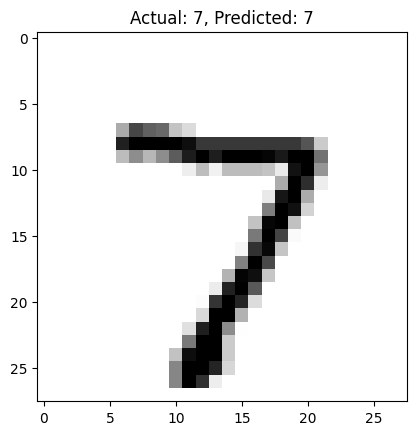

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. LOAD DATASET (Built-in)
print("Loading MNIST dataset...")
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. PREPROCESS
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# 3. BUILD THE MODEL (Artificial Neural Network)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Convert 28x28 image to a flat 784 vector
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dropout(0.2),                   # Prevents overfitting
    layers.Dense(10, activation='softmax') # Output layer (10 digits)
])

# 4. COMPILE THE MODEL
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. TRAIN THE MODEL
print("\nStarting Training...")
model.fit(X_train, y_train, epochs=5)

# 6. EVALUATE
print("\nEvaluating on Test Data:")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nFinal Test Accuracy: {test_acc:.2%}')

# 7. VISUALIZE A PREDICTION
prediction = model.predict(X_test)
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.title(f"Actual: {y_test[0]}, Predicted: {np.argmax(prediction[0])}")
plt.show()